In [1]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from collections import Counter
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
file_name='Movie_combined.csv'
df=pd.read_csv(file_name)

In [3]:
df.head()

,Unnamed: 0,Title,Genre,Plot,Poster
0,0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...


In [4]:
df = df[['Title', 'Plot','Genre']]

In [5]:
df.head()

,Title,Plot,Genre
0,the great train robbery,The film opens with two bandits breaking into ...,action
1,the suburbanite,The film is about a family who move to the sub...,comedy
2,how brown saw the baseball game,Before heading out to a baseball game at a nea...,comedy
3,the adventures of dollie,On a beautiful summer day a father and mother ...,drama
4,the black viper,A thug accosts a girl as she leaves her workpl...,drama


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17303 entries, 0 to 17302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   17303 non-null  object
 1   Plot    17303 non-null  object
 2   Genre   17303 non-null  object
dtypes: object(3)
memory usage: 405.7+ KB


In [7]:
df.describe()

,Title,Plot,Genre
count,17303,17303,17303
unique,16620,16584,6
top,prey,"At night, a carnivorous, shape-shifting alien ...",drama
freq,9,9,5793


In [8]:
for index, row in df.iterrows():
    # Check if the value in the 'plot' column is a float
    if isinstance(row['Plot'], float):
        print(f"Row {index} contains a float value in the 'plot' column.")

In [9]:
duplicates = df.duplicated()
print(df[duplicates])

                    Title                                               Plot  \
33             the escape  The film begins with a short prologue explaini...   
34             the escape  The film begins with a short prologue explaini...   
86     great expectations  A young boy, Pip, runs into an escaped convict...   
112              the cook  Fatty is the head chef at the "Bull Pup" resta...   
202                  love  A young woman, Natalie Storm (played by Glaum)...   
...                   ...                                                ...   
17236               quick  Seoul, 2004. A group of bikers are joy-riding ...   
17240               blind  A missing person case involving a female unive...   
17241               blind  A missing person case involving a female unive...   
17279               honey  In the remote and undeveloped eastern Black Se...   
17280               honey  In the remote and undeveloped eastern Black Se...   

          Genre  
33        drama  
34 

In [10]:
df = df.drop_duplicates()

# Verify results
print("Duplicates removed. Number of rows:", len(df))

Duplicates removed. Number of rows: 16644


In [11]:
df.head()

,Title,Plot,Genre
0,the great train robbery,The film opens with two bandits breaking into ...,action
1,the suburbanite,The film is about a family who move to the sub...,comedy
2,how brown saw the baseball game,Before heading out to a baseball game at a nea...,comedy
3,the adventures of dollie,On a beautiful summer day a father and mother ...,drama
4,the black viper,A thug accosts a girl as she leaves her workpl...,drama


In [12]:
num_unique_genres = df['Genre'].nunique()
print("Number of unique genres:", num_unique_genres)

Number of unique genres: 6


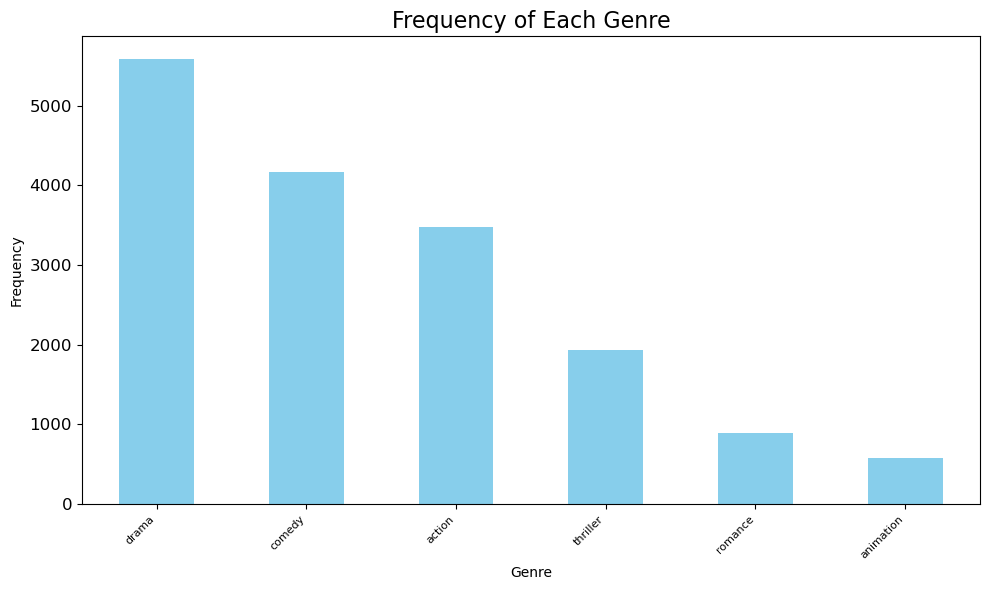

In [13]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Genre', fontsize=16)  # Set title font size
plt.xlabel('Genre', fontsize=10)  # Set x-axis label font size
plt.ylabel('Frequency', fontsize=10)  # Set y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and set x-axis tick label font size
plt.yticks(fontsize=12)  # Set y-axis tick label font size
plt.tight_layout()
plt.show()

In [14]:
Counter(df["Title"]).most_common()

[('angel', 4),
 ('romance', 3),
 ('godzilla', 3),
 ('darling', 3),
 ('i love you', 3),
 ('love', 2),
 ('the valiant', 2),
 ('welcome home', 2),
 ('oh, what a night', 2),
 ('i, the jury', 2),
 ('another time, another place', 2),
 ('tarzan, the ape man', 2),
 ('see no evil', 2),
 ('the karate kid', 2),
 ('mother', 2),
 ('war', 2),
 ('london', 2),
 ('the importance of being earnest', 2),
 ('the great train robbery', 1),
 ('the suburbanite', 1),
 ('how brown saw the baseball game', 1),
 ('the adventures of dollie', 1),
 ('the black viper', 1),
 ('a calamitous elopement', 1),
 ('the fight for freedom', 1),
 ('at the altar', 1),
 ("a drunkard's reformation", 1),
 ('the golden louis', 1),
 ('an arcadian maid', 1),
 ('hemlock hoax, the detective', 1),
 ('the house with closed shutters', 1),
 ('a lad from old ireland', 1),
 ('the black arrow: a tale of the two roses', 1),
 ('brown of harvard', 1),
 ('sweet memories', 1),
 ('the musketeers of pig alley', 1),
 ('petticoat camp', 1),
 ('put yourse

In [15]:
df[df["Title"] == "angel"]

,Title,Plot,Genre
6179,angel,Fifteen-year-old honor student Molly Stewart (...,action
13039,angel,Angel Deverell (Romola Garai) is considered an...,drama
13821,angel,After Interpol destroys a mass of Thai opium f...,action
15001,angel,"Abhay is a careless, high on life boy who live...",drama


In [16]:
Counter(df["Plot"].apply(lambda x: x[:50])).most_common()

[('The plot revolves around the players on a hockey t', 4),
 ('Jaihind is the journey of five people, linked by o', 3),
 ('Hoppity the Grasshopper, after a period spent away', 2),
 ('Eastern school teacher Catherine Allen becomes not', 2),
 ('Captain Phillip Donlin (Lloyd Bridges) and his sma', 2),
 ('Jack Flynn is driving down a highway at night, loo', 2),
 ('Paul Winchell plays a father to Jerry Mahoney who ', 2),
 ('Herbert H. Heebert (Jerry Lewis) is a young man wh', 2),
 ('A 38-year-old writer of pornographic novels named ', 2),
 ('In the fictional country of Lugash, a mysterious t', 2),
 ('Following the grisly suicide of the U.S. Ambassado', 2),
 ('By the end of the 19th century, Butch Cassidy, the', 2),
 ('Bill Markham (Powers Boothe) is an engineer who ha', 2),
 ('Ben White (Reb Brown) attends the funeral of his s', 2),
 ('As noted above, Jackie Chan re-edited The Protecto', 2),
 ('We see the origin of Pinhead as a British military', 2),
 ('While on a routine patrol on United S

In [17]:
df[df["Plot"].str.contains("The plot revolves around the players on a hockey t")]

,Title,Plot,Genre
13302,les boys,The plot revolves around the players on a hock...,comedy
13307,les boys ii,The plot revolves around the players on a hock...,comedy
13343,les boys iii,The plot revolves around the players on a hock...,comedy
13385,les boys iv,The plot revolves around the players on a hock...,comedy


In [18]:
Counter(df["Genre"]).most_common()

[('drama', 5590),
 ('comedy', 4170),
 ('action', 3482),
 ('thriller', 1935),
 ('romance', 888),
 ('animation', 579)]

In [19]:
labels = list(set(df["Genre"]))
labels

['romance', 'comedy', 'thriller', 'animation', 'action', 'drama']

In [20]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
label2id

{'romance': 0,
 'comedy': 1,
 'thriller': 2,
 'animation': 3,
 'action': 4,
 'drama': 5}

In [21]:
# Check the number of unique genres in df_20["genre"]
num_unique_genres = df["Genre"].nunique()

# Check the number of unique labels in the label2id mapping
num_unique_labels = len(label2id)

# Ensure consistency
if num_unique_genres != num_unique_labels:
    raise ValueError("Number of unique genres in df_20 does not match the number of unique labels in the label2id mapping.")

# If they match, proceed with creating the "label" column
df["label"] = df["Genre"].apply(lambda x: label2id[x])


In [22]:
df.head()

,Title,Plot,Genre,label
0,the great train robbery,The film opens with two bandits breaking into ...,action,4
1,the suburbanite,The film is about a family who move to the sub...,comedy,1
2,how brown saw the baseball game,Before heading out to a baseball game at a nea...,comedy,1
3,the adventures of dollie,On a beautiful summer day a father and mother ...,drama,5
4,the black viper,A thug accosts a girl as she leaves her workpl...,drama,5


In [23]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=42) 

In [24]:
from datasets import Features, ClassLabel, Value, Dataset, DatasetDict

# Define the schema to match your DataFrame columns
ds_features = Features({
    "Title": Value("string"),
    "Plot": Value("string"),
    "Genre": Value("string"),
    "label": ClassLabel(names=labels)
})

# Create the Dataset from your DataFrame with the updated schema
dataset = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True), features=ds_features),
    "valid": Dataset.from_pandas(df_val.reset_index(drop=True), features=ds_features),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True), features=ds_features)
})

dataset


DatasetDict({
    train: Dataset({
        features: ['Title', 'Plot', 'Genre', 'label'],
        num_rows: 9986
    })
    valid: Dataset({
        features: ['Title', 'Plot', 'Genre', 'label'],
        num_rows: 3329
    })
    test: Dataset({
        features: ['Title', 'Plot', 'Genre', 'label'],
        num_rows: 3329
    })
})

In [25]:
stopwords_en = stopwords.words("english")
most_common_words = {}

for l in labels:
    tokenized_text = df_train[df_train["Genre"] == l]["Plot"].str.lower().apply(
        lambda x: [e for e in word_tokenize(x) if e not in stopwords_en and len(e) > 2]
    )
    
    most_common_words[l] = Counter(tokenized_text.explode()).most_common()

In [26]:
for k,v in most_common_words.items():
    print(k,"\n",v[:15])
    print("="*120)

romance 
 [('love', 1016), ('father', 563), ('one', 412), ('family', 396), ('tells', 388), ('get', 349), ('time', 341), ('life', 340), ('back', 339), ('day', 324), ('gets', 322), ('marriage', 311), ('goes', 301), ('house', 301), ('mother', 298)]
comedy 
 [('one', 1765), ('back', 1658), ('get', 1600), ('new', 1491), ('two', 1480), ('home', 1308), ('father', 1267), ('tells', 1173), ('man', 1159), ('find', 1148), ('house', 1145), ('time', 1139), ('love', 1110), ('also', 1101), ('money', 1097)]
thriller 
 [('one', 1243), ('house', 1207), ('back', 1024), ('police', 1013), ('tells', 958), ('finds', 945), ('later', 871), ('man', 867), ('two', 852), ('find', 826), ('home', 789), ('death', 787), ('killed', 773), ('goes', 734), ('kill', 730)]
animation 
 [('tom', 918), ('jerry', 646), ('bugs', 566), ('back', 523), ('one', 340), ('however', 298), ('time', 290), ('find', 278), ('two', 262), ('away', 244), ('tells', 231), ('tries', 229), ('house', 220), ('home', 215), ('new', 209)]
action 
 [('one'

In [27]:
most_common_words_10k = {}
for k,v in most_common_words.items():
    most_common_words_10k[k] = [word for word,count in v][:10000]
    
most_common_words_10k["romance"][:3], len(most_common_words_10k["romance"])

(['love', 'father', 'one'], 10000)

In [28]:
idx = 3
df_val.iloc[idx]

Title                                      sonna puriyathu
Plot     Shiva (Shiva) is a dubbing artist and a person...
Genre                                               comedy
label                                                    1
Name: 16011, dtype: object

In [29]:
for genre, words in most_common_words_10k.items():
    print(genre)
    print(len(list(set(word_tokenize(df_val.iloc[idx]["Plot"])) & set(words))))
    print("="*10)


romance
123
comedy
121
thriller
117
animation
110
action
116
drama
121


In [30]:
import numpy as np
from random import randint

def count_classifier(row):
    len_intersection = []
    
    for l in labels:
        len_intersection.append(len(list(set(word_tokenize(row)) & set(most_common_words_10k[l]))))

    winner = list(np.argwhere(len_intersection == np.amax(len_intersection)).flatten())
    
    if len(winner) == 1:
        pred = winner[0]
    else:
        pred = winner[randint(0,len(winner)-1)]
    
    return pred

In [31]:
df_val["count_clf_pred"] = df_val["Plot"].apply(count_classifier)
df_val

,Title,Plot,Genre,label,count_clf_pred
3594,hold back tomorrow,A death row inmate has one final request befor...,drama,5,5
14020,ram lakshman,Ram (Kamal Haasan) and his pet elephant Laxman...,romance,0,4
4644,toys in the attic,Julian Berniers returns from Illinois with his...,drama,5,4
16011,sonna puriyathu,Shiva (Shiva) is a dubbing artist and a person...,comedy,1,0
2098,the keys of the kingdom,Father Francis Chisholm (Gregory Peck) is visi...,drama,5,5
...,...,...,...,...,...
13162,in praise of older women,Andras Vayda (Tom Berenger) grows up in a turb...,drama,5,0
11693,the calendar,"After losing his money at the races, a racehor...",drama,5,1
16949,king of thorn,King of Thorn is a science fiction survivor dr...,animation,3,4
15603,aajcha divas majha,The movie is an entertaining and a cinematic j...,drama,5,5


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [33]:
print(classification_report(list(df_val["label"]),df_val["count_clf_pred"], target_names=labels))

              precision    recall  f1-score   support

     romance       0.20      0.20      0.20       181
      comedy       0.48      0.48      0.48       813
    thriller       0.41      0.58      0.48       373
   animation       0.40      0.54      0.46       122
      action       0.57      0.50      0.53       709
       drama       0.52      0.47      0.50      1131

    accuracy                           0.48      3329
   macro avg       0.43      0.46      0.44      3329
weighted avg       0.49      0.48      0.48      3329



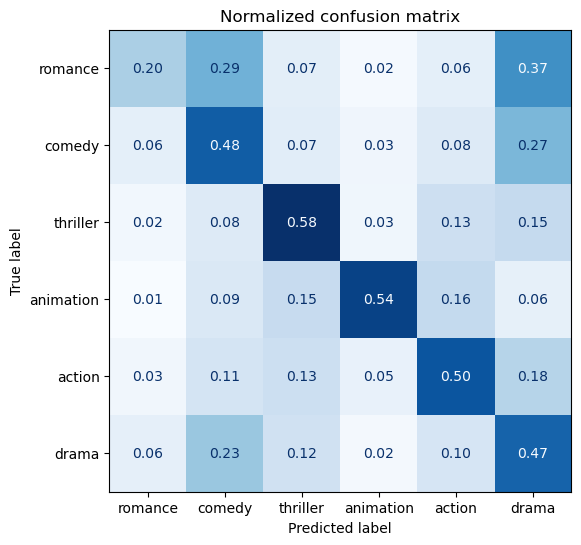

In [34]:
plot_confusion_matrix(df_val["count_clf_pred"], list(df_val["label"]), labels)